In [373]:
import click
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset, WeightedRandomSampler


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [65]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [66]:
dataset = CIFAR10(train=True, download=True,
                  root="../data", transform=transform)
test_data = CIFAR10(train=False, download=True,
                    root="../data", transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [42]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
def check_class_balance(dataset): 
    targets = np.array(dataset.targets)
    classes, class_counts = np.unique(targets, return_counts=True)
    nb_classes = len(classes)
    print(class_counts)

In [71]:
def create_imbalance(dataset): 
    check_class_balance(dataset)
    targets = np.array(dataset.targets)
    # Create artificial imbalanced class counts, one of the classes has 805 of observations removed
    # We sample from the class that doesn't have many classes 
    imbal_class_counts = [5000,5000,5000,5000,5000,5000,5000,5000,5000,1000]

    # Get class indices
    class_indices = [np.where(targets == i)[0] for i in range(10)]

    # Get imbalanced number of instances
    imbal_class_indices = [class_idx[:class_count] for class_idx, class_count in zip(class_indices, imbal_class_counts)]
    imbal_class_indices = np.hstack(imbal_class_indices)

    # Set target and data to dataset
    dataset.targets = targets[imbal_class_indices]
    dataset.data = dataset.data[imbal_class_indices]

    assert len(dataset.targets) == len(dataset.data)
    print("After imbalance: {}".format(check_class_balance(dataset)))

    return dataset 

In [73]:
transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # transform - transforms data during creation, downloads it locally, stores it in root, is train 
dataset = CIFAR10(train=True, download=True, root="../data", transform=transform)

Files already downloaded and verified


In [266]:
dataset

Dataset CIFAR10
    Number of datapoints: 46000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [267]:
dataset.targets[1]

0

In [268]:
dataset.data[1].shape

(32, 32, 3)

In [269]:
def check_sizes(dataset): 
    sizes = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
    for d in dataset.targets: 
        sizes[d] += 1
    return sizes

In [270]:
check_sizes(dataset)

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 1000}

In [383]:
def create_imbalance(dataset): 
    check_class_balance(dataset)
    targets = np.array(dataset.targets)
    # Create artificial imbalanced class counts, one of the classes has 805 of observations removed
    # We sample from the class that doesn't have many classes 
    imbal_class_counts = [5000,5000,5000,5000,5000,5000,5000,5000,5000,1000]

    # Get class indices
    class_indices = [np.where(targets == i)[0] for i in range(10)]

    # Get imbalanced number of instances
    imbal_class_indices = [class_idx[:class_count] for class_idx, class_count in zip(class_indices, imbal_class_counts)]
    imbal_class_indices = np.hstack(imbal_class_indices)

    print("imb class idx: {}".format(imbal_class_indices))
    # Set target and data to dataset
    dataset.targets = targets[imbal_class_indices]
    dataset.data = dataset.data[imbal_class_indices]
    
    print(len(dataset.targets))
    print(dataset.targets[0:10])
    print(len(dataset.data))

    assert len(dataset.targets) == len(dataset.data)
    print("After imbalance: {}".format(check_class_balance(dataset)))

    return dataset 

def create_oversample(dataset): 
    check_class_balance(dataset)
    targets = np.array(dataset.targets)
    # Create artificial imbalanced class counts, one of the classes has 805 of observations removed
    # We sample from the class that doesn't have many classes 
    imbal_class_counts = [5000,5000,5000,5000,5000,5000,5000,5000,5000,1000]

    # Get class indices
    class_indices = [np.where(targets == i)[0] for i in range(10)]

    # Get imbalanced number of instances
    imbal_class_indices = [class_idx[:class_count] for class_idx, class_count in zip(class_indices, imbal_class_counts)]
    imbal_class_indices = np.hstack(imbal_class_indices)

    print("imb class idx: {}".format(imbal_class_indices))
    # Set target and data to dataset
    dataset.targets = targets[imbal_class_indices]
    dataset.data = dataset.data[imbal_class_indices]
    
    print(len(dataset.targets))
    print(dataset.targets[0:10])
    print(len(dataset.data))

    assert len(dataset.targets) == len(dataset.data)
    print("After imbalance: {}".format(check_class_balance(dataset)))

    return dataset 

In [381]:
imb_dataset = create_imbalance(dataset)
check_sizes(imb_dataset)

[5000 5000 5000 5000 5000 5000 5000 5000 5000 1000]
imb class idx: [    0     1     2 ... 45997 45998 45999]
46000
[0 0 0 0 0 0 0 0 0 0]
46000
[5000 5000 5000 5000 5000 5000 5000 5000 5000 1000]
After imbalance: None


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 1000}

In [379]:
type(imb_dataset)

torchvision.datasets.cifar.CIFAR10

In [397]:
target = imb_dataset.targets
class_sample_count = np.unique(target, return_counts=True)[1]
print(class_sample_count)

[5000 5000 5000 5000 5000 5000 5000 5000 5000 1000]


In [399]:
weight = 1. / class_sample_count
weight

array([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0002, 0.001 ])

In [400]:
samples_weight = weight[target]

In [404]:
len(samples_weight)

46000

In [385]:
weight = 1. / class_sample_count
samples_weight = weight[target]
samples_weight = torch.from_numpy(samples_weight)
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(
    imb_dataset, batch_size=10, num_workers=1, sampler=sampler)

In [390]:
class_sample_count

array([4000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 1000])

In [389]:
weight 

array([0.00025, 0.0002 , 0.0002 , 0.0002 , 0.0002 , 0.0002 , 0.0002 ,
       0.0002 , 0.0002 , 0.001  ])

In [388]:
print(samples_weight)

tensor([0.0002, 0.0010, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0003, 0.0002,
        0.0010], dtype=torch.float64)


In [387]:
for batch_idx, (data, target) in enumerate(train_loader):
    print('Batch {}, classes {}, count {}'.format(
        batch_idx, *np.unique(target.numpy(), return_counts=True)))

Batch 0, classes [0], count [10]


In [ ]:
import random
def generate_random(n):
    random_idx = [] 
    for i in range(n):
        random_idx.append(random.randint(0,999))
    print("{}".format(len(random_idx)))
    return random_idx 

indices = generate_random(4000)
class_nine = [] 
for i in range(len(imb_dataset)): 
    if imb_dataset.__getitem__(i)[1] == 9:
        class_nine.append(imb_dataset.__getitem__(i))

samples = [] 
for idx in indices: 
    samples.append(class_nine[idx])

In [300]:
samples_x = np.array([samples[i][0].numpy() for i in range(len(samples))])
samples_y = [samples[i][1] for i in range(len(samples))]

In [322]:
# converting OG dataset to arrays 
og_dataset = [] 
for i in range(len(imb_dataset)): 
    new_tuple = (imb_dataset[i][0].numpy(), imb_dataset[i][1])
    og_dataset.append(new_tuple)

In [343]:
sampled_dataset = [] 
for i in range(len(samples_x)):
    new_tuple = (samples_x[i], samples_y[i])
    sampled_dataset.append(new_tuple)

In [356]:
test = np.append(og_dataset, sampled_dataset, axis=0)

In [357]:
test.shape

(50000, 2)

In [68]:
def load_data(show=False, imbalanced=None):
    torch.manual_seed(1)

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # transform - transforms data during creation, downloads it locally, stores it in root, is train 
    dataset = CIFAR10(train=True, download=True, root="../data", transform=transform)
    test_data = CIFAR10(train=False, download=True, root="../data", transform=transform)
    print("Train Size: {}, Test Size: {}".format(len(dataset), len(test_data)))

    val_size = 5000
    if imbalanced:
        dataset = create_imbalance(dataset)
        val_size = 4600  # dataset is now 46000
    
    print("Train Size: {}, Test Size: {}".format(len(dataset), len(test_data)))

    train_size = len(dataset) - val_size

    # Splitting into train/test/validation
    train_ds, val_ds = random_split(dataset, [train_size, val_size])

    # forming batches, putting into loader:
    batch_size = 128 
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=4)
    test_loader = DataLoader(test_data, batch_size=batch_size, num_workers=4)

    # loading the dataset --> DataLoader class (torch.utils.data.DataLoader)
    classes = dataset.classes 
    print("Classes: {}".format(classes))

    # showing image
    if show: 
        # getting random training images 
        dataiter = iter(train_loader)
        images, labels = dataiter.next() 

        # showing images 
        show_image(torchvision.utils.make_grid(images))
        print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

    return train_loader, val_loader, test_loader

In [69]:
train_loader, val_loader, test_loader = load_data(show=False, imbalanced=True)

Files already downloaded and verified
Files already downloaded and verified
Train Size: 50000, Test Size: 10000
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 1000]
After imbalance: None
Train Size: 46000, Test Size: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [57]:
train_loader.dataset

In [70]:
# print("------ CHECKING TRAIN ------")
# for i, (inputs, labels) in enumerate(train_loader):
#     if i > 3: 
#         break
#     print(labels)
    
# print("------ CHECKING TEST ------")
# for i, (inputs, labels) in enumerate(test_loader):
#     if i > 3: 
#         break
#     print(labels)

# print("------ CHECKING VALIDATION ------")
# for i, (inputs, labels) in enumerate(val_loader):
#     if i > 3: 
#         break
#     print(labels)

------ CHECKING TRAIN ------
tensor([3, 6, 7, 4, 7, 1, 6, 7, 7, 8, 3, 5, 5, 5, 5, 0, 2, 2, 0, 6, 7, 5, 4, 0,
        5, 5, 0, 4, 6, 7, 0, 3, 6, 6, 7, 1, 2, 2, 8, 0, 4, 7, 4, 3, 1, 2, 8, 7,
        2, 1, 7, 4, 5, 0, 6, 6, 8, 7, 3, 6, 8, 6, 0, 4, 7, 7, 1, 5, 1, 3, 7, 7,
        1, 5, 6, 7, 1, 6, 1, 0, 7, 7, 1, 3, 2, 5, 0, 7, 8, 9, 6, 2, 7, 5, 1, 8,
        7, 7, 1, 3, 2, 3, 4, 1, 1, 0, 6, 1, 0, 5, 0, 6, 4, 2, 0, 8, 1, 8, 3, 5,
        6, 2, 1, 3, 2, 7, 7, 5])
tensor([1, 5, 7, 6, 0, 3, 5, 3, 5, 2, 5, 7, 8, 5, 7, 1, 2, 4, 9, 5, 0, 5, 3, 3,
        6, 7, 5, 6, 8, 3, 7, 6, 7, 6, 4, 5, 3, 6, 7, 3, 4, 4, 0, 5, 0, 6, 6, 9,
        6, 8, 8, 4, 2, 5, 1, 3, 6, 2, 3, 2, 4, 5, 0, 1, 2, 5, 3, 8, 5, 2, 1, 4,
        8, 7, 7, 3, 6, 3, 5, 1, 0, 4, 6, 5, 8, 1, 2, 9, 0, 2, 0, 3, 0, 8, 1, 7,
        4, 7, 9, 7, 8, 7, 5, 6, 2, 8, 5, 0, 4, 1, 4, 1, 6, 3, 4, 6, 6, 8, 3, 1,
        6, 8, 0, 2, 7, 5, 6, 2])
tensor([7, 2, 3, 3, 8, 2, 8, 2, 2, 2, 3, 8, 5, 7, 0, 7, 0, 6, 5, 6, 0, 5, 0, 0,
        2, 3, 3, 1, 9, 6,

In [416]:
def load_train():
    torch.manual_seed(1)
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    train_data = CIFAR10(train=True, download=True,
                      root="../data", transform=transform)

    # creating imbalance for class #10 for the train data. 
    imbalanced_train = create_imbalance(train_data)

    # splitting into a train and a validation 
    # creating the weighted sampler for both of these 
    # validation set is 4600 (10% of train), Train is 90%. 
    train_ds, val_ds = random_split(imbalanced_train, [41400, 4600])

    # create sampler
    sampler = adjust_imbalance_sampler(imbalanced_train)
    train_loader = DataLoader(train_ds, batch_size=200, num_workers=4, sampler=sampler)
    val_loader = DataLoader(val_ds, batch_size=200, sampler=sampler, num_workers=4)

    test_data = CIFAR10(train=False, download=True,
                        root="../data", transform=transform)
    test_loader = DataLoader(
        test_data, batch_size=200, num_workers=4, shuffle=True)

    return train_loader, val_loader, test_loader 


In [417]:
def adjust_imbalance_sampler(dataset):
    print(dataset)
    targets = dataset.targets
    class_count = np.unique(targets, return_counts=True)[1]
    print(class_count)

    weight = 1. / class_count
    samples_weight = weight[targets]
    samples_weight = torch.from_numpy(samples_weight)
    sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
    return sampler

In [418]:
train_loader, val_loader, test_loader = load_train()

Files already downloaded and verified
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
imb class idx: [   29    30    35 ... 10178 10187 10198]
46000
[0 0 0 0 0 0 0 0 0 0]
46000
[5000 5000 5000 5000 5000 5000 5000 5000 5000 1000]
After imbalance: None
Dataset CIFAR10
    Number of datapoints: 46000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
[5000 5000 5000 5000 5000 5000 5000 5000 5000 1000]
Files already downloaded and verified


In [414]:
train_loader

# manually normalizing 

In [18]:
from download_cifar import *

In [ ]:
datasplits = load_imb_data() 

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Images shape: (50000, 32, 32, 3)
Sample Image: [[[ 59.  62.  63.]
  [ 43.  46.  45.]
  [ 50.  48.  43.]
  ...
  [158. 132. 108.]
  [152. 125. 102.]
  [148. 124. 103.]]

 [[ 16.  20.  20.]
  [  0.   0.   0.]
  [ 18.   8.   0.]
  ...
  [123.  88.  55.]
  [119.  83.  50.]
  [122.  87.  57.]]

 [[ 25.  24.  21.]
  [ 16.   7.   0.]
  [ 49.  27.   8.]
  ...
  [118.  84.  50.]
  [120.  84.  50.]
  [109.  73.  42.]]

 ...

 [[208. 170.  96.]
  [201. 153.  34.]
  [198. 161.  26.]
  ...
  [160. 133.  70.]
  [ 56.  31.   7.]
  [ 53.  34.  20.]]

 [[180. 139.  96.]
  [173. 123.  42.]
  [186. 144.  30.]
  ...
  [184. 148.  94.]
  [ 97.  62.  

In [9]:
x_train = datasplits['train']['X']

In [4]:
import matplotlib.pyplot as plt

In [5]:
x_train[0].shape

(3, 32, 32)

In [12]:
# transposing 
reshape_x_train = x_train[0].reshape([32, 32, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


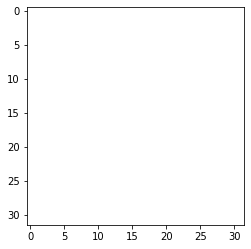

In [14]:
plt.imshow(reshape_x_train)